import i operacje na shp

In [2]:
import geopandas as gpd

In [15]:
gdf = gpd.read_file('06/PRG_PunktyAdresowe_06.shp')

In [16]:
gdf.info

<bound method DataFrame.info of          TERYT     PNA  SIMC_id      SIMC_nazwa ULIC_id ULIC_nazwa Numer  \
0       060108  21-542  0014574         Droblin     NaN        NaN    16   
1       060108  21-542  0014551        Bukowice     NaN        NaN    70   
2       060108  21-542  0014657        Ludwinów     NaN        NaN    18   
3       060108  21-542  0014663       Mariampol     NaN        NaN    1C   
4       060108  21-542  0014551        Bukowice     NaN        NaN    80   
...        ...     ...      ...             ...     ...        ...   ...   
593493  061002  21-075  0385023  Zezulin Niższy     NaN        NaN    38   
593494  061002  21-075  0385023  Zezulin Niższy     NaN        NaN    55   
593495  061002  21-075  0385023  Zezulin Niższy     NaN        NaN    81   
593496  061002  21-075  0385023  Zezulin Niższy     NaN        NaN    17   
593497  061002  21-075  0385023  Zezulin Niższy     NaN        NaN    61   

                             geometry  
0       POINT (

In [ ]:
gdf[gdf['SIMC_id']==17302]

In [ ]:
gdf['ULIC_nazwa']

In [20]:
import pandas as pd

zamiana id nazwy simc na numeryczną kolumnę

In [39]:
gdf['SIMC_id'] = pd.to_numeric(gdf['SIMC_id'], errors='coerce').astype('Int64')

In [40]:
gdf

,TERYT,PNA,SIMC_id,SIMC_nazwa,ULIC_id,ULIC_nazwa,Numer,geometry
0,060108,21-542,14574,Droblin,NaN,NaN,16,POINT (772157.800 482063.193)
1,060108,21-542,14551,Bukowice,NaN,NaN,70,POINT (774868.849 483486.386)
2,060108,21-542,14657,Ludwinów,NaN,NaN,18,POINT (775911.648 480317.045)
3,060108,21-542,14663,Mariampol,NaN,NaN,1C,POINT (777098.467 482112.624)
4,060108,21-542,14551,Bukowice,NaN,NaN,80,POINT (774961.562 483105.039)
...,...,...,...,...,...,...,...,...
593493,061002,21-075,385023,Zezulin Niższy,NaN,NaN,38,POINT (765634.227 393776.438)
593494,061002,21-075,385023,Zezulin Niższy,NaN,NaN,55,POINT (766605.007 393840.478)
593495,061002,21-075,385023,Zezulin Niższy,NaN,NaN,81,POINT (767215.021 394292.734)
593496,061002,21-075,385023,Zezulin Niższy,NaN,NaN,17,POINT (767062.731 394831.148)


import i operacje na csv z nazwami miejscowosci

In [24]:
df = pd.read_csv('SIMC_Urzedowy_2023-10-11.csv', sep=';')

In [ ]:
df[df['SYM']==17302]

ograniczenie do woj. lubelskiego

In [36]:
df2 = df[df['WOJ']== 6].drop('WOJ', axis=1)

In [50]:
df2

,POW,GMI,RODZ_GMI,RM,MZ,NAZWA,SYM,SYMPOD,STAN_NA
9189,1,5,2,1,1,Peredyło,13050,13050,2023-01-01
9190,2,7,5,1,1,Majdan Nepryski,890420,890420,2023-01-01
9191,3,7,2,1,1,Horodysko,104780,104780,2023-01-01
9192,1,10,2,1,1,Pościsze,15970,15970,2023-01-01
9193,1,10,2,1,1,Rogoźnica-Kolonia,16107,16107,2023-01-01
...,...,...,...,...,...,...,...,...,...
17060,8,5,5,2,1,Kokosz,382504,382504,2023-01-01
17061,9,14,2,2,1,Kolonia Pliszczyn,393985,393985,2023-01-01
17062,8,5,5,2,1,Krzywy Dąb,382510,382510,2023-01-01
17063,9,13,2,2,1,Wojciechów-Kolonia Pierwsza,393896,393896,2023-01-01


rysowanie punktow adresowych

In [52]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, markersize=5, color='red', label='Punkty')
plt.show()

merge tabel, żeby była jedna z id miejscowosci i rodzajem

In [68]:
df_nazwy = df[['RM', 'SYM']]
df_nazwy = df_nazwy.rename(columns={'SYM': 'SIMC_id'})
df_nazwy

,RM,SIMC_id
0,1,856824
1,1,856920
2,1,188794
3,1,188819
4,1,189517
...,...,...
102306,1,785640
102307,1,772837
102308,1,772895
102309,1,178956


In [69]:
df_rodzaje = pd.DataFrame({'RM': [0, 1, 2, 3, 4, 5, 6, 7, 95, 96, 98, 99], 
                           'RODZAJ': ['część miejscowości', 'wieś', 'kolonia', 'przysiółek', 'osada', 'osada leśna', 'osiedle', 'schronisko turystyczne', 'dzielnica m. st. Warszawy', 'miasto', 'delegatura', 'część miasta']})
df_rodzaje

,RM,RODZAJ
0,0,część miejscowości
1,1,wieś
2,2,kolonia
3,3,przysiółek
4,4,osada
5,5,osada leśna
6,6,osiedle
7,7,schronisko turystyczne
8,95,dzielnica m. st. Warszawy
9,96,miasto


In [70]:
df_merged_simc = pd.merge(df_nazwy, df_rodzaje, on='RM', how='inner') 
df_merged_simc

,RM,SIMC_id,RODZAJ
0,1,856824,wieś
1,1,856920,wieś
2,1,188794,wieś
3,1,188819,wieś
4,1,189517,wieś
...,...,...,...
102306,95,988827,dzielnica m. st. Warszawy
102307,95,988833,dzielnica m. st. Warszawy
102308,95,988840,dzielnica m. st. Warszawy
102309,95,988856,dzielnica m. st. Warszawy


dodanie do tabeli z geometrią rodzaju miejscowosci

In [71]:
gdf

,TERYT,PNA,SIMC_id,SIMC_nazwa,ULIC_id,ULIC_nazwa,Numer,geometry
0,060108,21-542,14574,Droblin,NaN,NaN,16,POINT (772157.800 482063.193)
1,060108,21-542,14551,Bukowice,NaN,NaN,70,POINT (774868.849 483486.386)
2,060108,21-542,14657,Ludwinów,NaN,NaN,18,POINT (775911.648 480317.045)
3,060108,21-542,14663,Mariampol,NaN,NaN,1C,POINT (777098.467 482112.624)
4,060108,21-542,14551,Bukowice,NaN,NaN,80,POINT (774961.562 483105.039)
...,...,...,...,...,...,...,...,...
593493,061002,21-075,385023,Zezulin Niższy,NaN,NaN,38,POINT (765634.227 393776.438)
593494,061002,21-075,385023,Zezulin Niższy,NaN,NaN,55,POINT (766605.007 393840.478)
593495,061002,21-075,385023,Zezulin Niższy,NaN,NaN,81,POINT (767215.021 394292.734)
593496,061002,21-075,385023,Zezulin Niższy,NaN,NaN,17,POINT (767062.731 394831.148)


In [73]:
gdf_merged = gdf.merge(df_merged_simc, on='SIMC_id', how='inner')
gdf_merged

,TERYT,PNA,SIMC_id,SIMC_nazwa,ULIC_id,ULIC_nazwa,Numer,geometry,RM,RODZAJ
0,060108,21-542,14574,Droblin,NaN,NaN,16,POINT (772157.800 482063.193),1,wieś
1,060108,21-542,14574,Droblin,NaN,NaN,30A,POINT (771822.347 482063.186),1,wieś
2,060108,21-542,14574,Droblin,NaN,NaN,59,POINT (770435.875 481650.758),1,wieś
3,060108,21-542,14574,Droblin,NaN,NaN,1,POINT (773175.474 481078.097),1,wieś
4,060108,21-542,14574,Droblin,NaN,NaN,49,POINT (770977.940 482097.224),1,wieś
...,...,...,...,...,...,...,...,...,...,...
593300,061002,21-075,384992,Stary Radzic,NaN,NaN,42A,POINT (765906.540 395369.520),1,wieś
593301,061002,21-075,384992,Stary Radzic,NaN,NaN,37,POINT (766291.234 396001.520),1,wieś
593302,061002,21-075,384992,Stary Radzic,NaN,NaN,26A,POINT (766194.660 396744.180),1,wieś
593303,061002,21-075,384992,Stary Radzic,NaN,NaN,26,POINT (766166.660 396722.340),1,wieś


C:\Users\agnie\AppData\Local\Temp\ipykernel_19024\3748450527.py:2: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  gdf_merged.plot(ax=ax, column='RODZAJ', markersize=5, legend=True, colormap='rainbow')


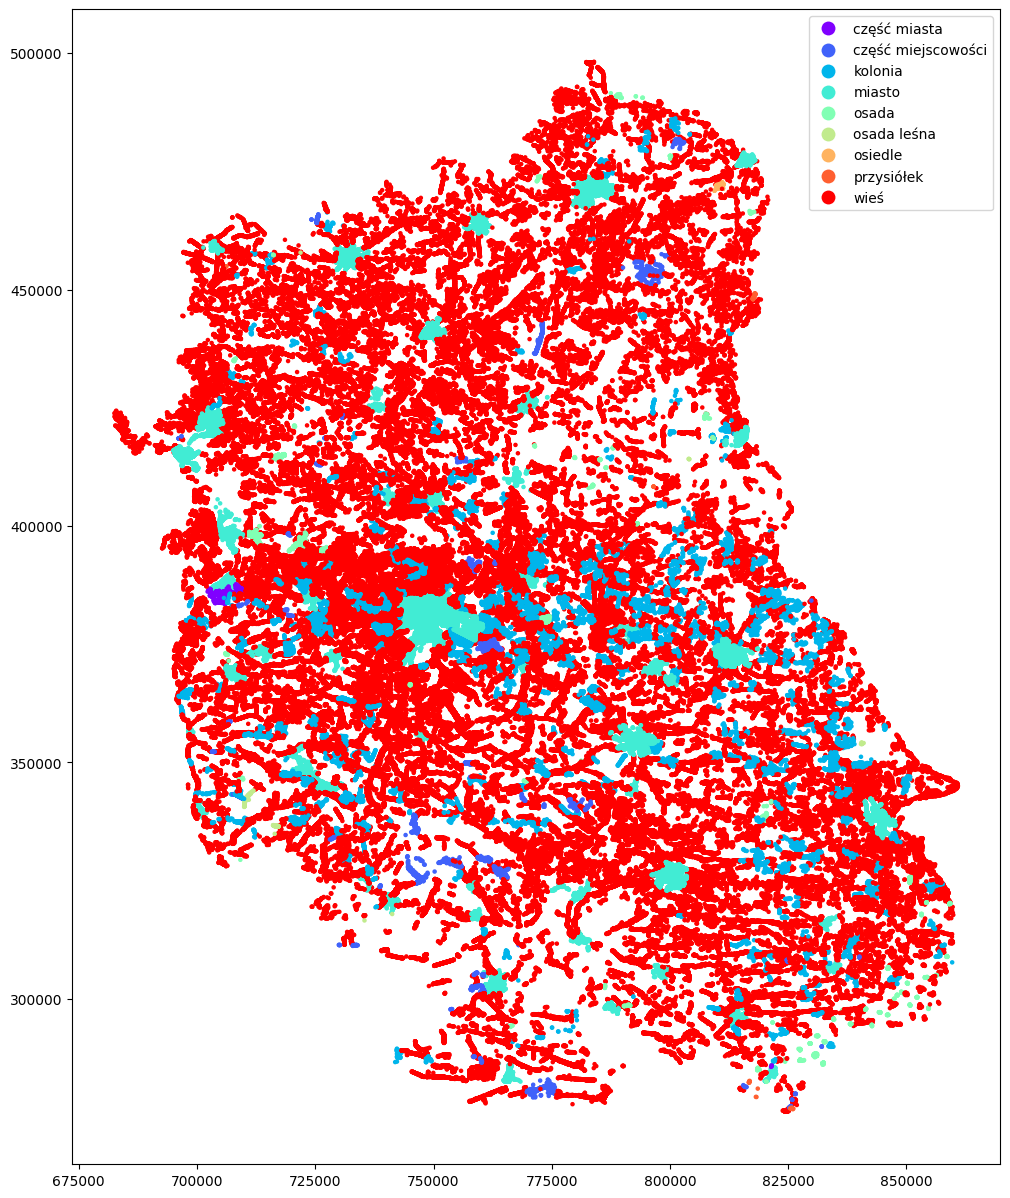

<Figure size 640x480 with 0 Axes>

In [83]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_merged.plot(ax=ax, column='RODZAJ', markersize=5, legend=True, colormap='rainbow')
plt.show()
plt.savefig("C:\studia\pracka\geoclassification\wykres.pdf", format='pdf')

In [82]:
plt.savefig("C:\studia\pracka\geoclassification\wykres.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>